In [1]:
import torch
import random
from torch import nn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [38]:
x = X_train[0]

In [35]:
def avgpool2d(X, pool_size):
    h,w = pool_size 
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
               Y[i, j] = X[i: i + h, j: j + w].mean()
        
    return Y

In [40]:
def maxpool2d(X, pool_size):
    h,w = pool_size 
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
               Y[i, j] = X[i: i + h, j: j + w].max()
        
    return Y

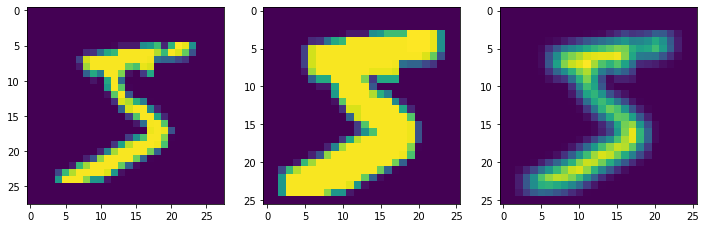

In [47]:
_, axs = plt.subplots(1, 3, figsize=(12, 12))
axs = axs.flatten()
imgs = [x, maxpool2d(x,(3,3)), avgpool2d(x,(3,3))]
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()